In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np

import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

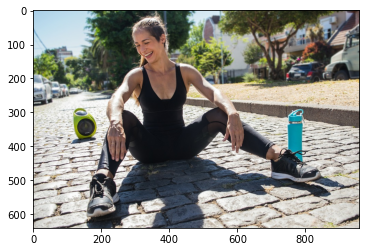

In [2]:
img = cv2.imread("girlf.jpg") 

image_rgb=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [3]:
pose = mp.solutions.pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

results = pose.process(image_rgb)
landmarks=results.pose_landmarks.landmark

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [10]:
def draw_points(image, landmarks, keys=None):
    mp_drawing = mp.solutions.drawing_utils
    drawing_spec = mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=2)
 
    if keys==None: keys=[ i for i in range(len(landmarks)) ]
     
    for key in keys:
        landmark_point = landmarks[key]
        x_px, y_px = int(landmark_point.x * image.shape[1]), int(landmark_point.y * image.shape[0])
        cv2.circle(image, (x_px, y_px), drawing_spec.circle_radius, drawing_spec.color, drawing_spec.thickness)
    return image 

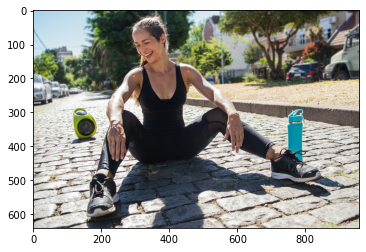

In [13]:
keys=[9,10,11,12,15,16]
image=draw_points(image_rgb.copy(), landmarks, keys)
plt.imshow(image)

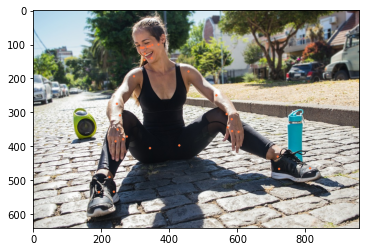

In [14]:
image=draw_points(image_rgb.copy(), landmarks)
plt.imshow(image)